<a href="https://colab.research.google.com/github/1s5ac/STA365_HW/blob/main/STA365_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Homework 5: Part I Answers

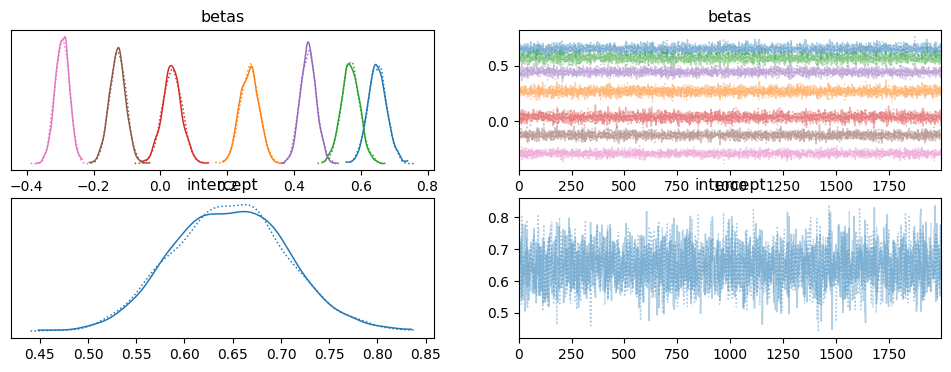

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
betas[0]   0.650  0.028   0.592    0.699      0.001    0.000    2898.0   
betas[1]   0.267  0.028   0.214    0.319      0.000    0.000    3477.0   
betas[2]   0.569  0.028   0.517    0.622      0.001    0.000    3044.0   
betas[3]   0.035  0.029  -0.020    0.091      0.000    0.000    4064.0   
betas[4]   0.443  0.024   0.400    0.490      0.000    0.000    3920.0   
betas[5]  -0.128  0.025  -0.176   -0.084      0.000    0.000    4245.0   
betas[6]  -0.294  0.022  -0.335   -0.255      0.000    0.000    4048.0   
intercept  0.647  0.059   0.540    0.761      0.001    0.001    3344.0   

           ess_tail  r_hat  
betas[0]     2553.0    1.0  
betas[1]     2802.0    1.0  
betas[2]     3371.0    1.0  
betas[3]     3167.0    1.0  
betas[4]     3205.0    1.0  
betas[5]     3260.0    1.0  
betas[6]     3179.0    1.0  
intercept    2947.0    1.0  


In [11]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/1s5ac/STA365_HW/main/apple_quality.csv'
data = pd.read_csv(url)

# Convert 'Acidity' to string first, then replace commas with dots and convert to numeric
data['Acidity'] = pd.to_numeric(data['Acidity'].astype(str).str.replace(',', '.'), errors='coerce')

# Convert the categorical 'Quality' variable to numeric binary format
data['Quality'] = data['Quality'].map({'good': 1, 'bad': 0})

# Drop the 'A_id' column as it's just an identifier
data = data.drop('A_id', axis=1)

# Define predictors X and response y
X = data.drop('Quality', axis=1).astype(float).values
y = data['Quality'].values

n, p = X.shape  # n is number of observations, p is number of predictors

with pm.Model() as MLR:
    # Priors for unknown model parameters
    betas = pm.MvNormal('betas', mu=np.zeros(p), cov=np.eye(p), shape=p)
    intercept = pm.Normal('intercept', mu=0, sigma=10)

    # Likelihood (sampling distribution) of observations for logistic regression
    logits = pm.math.dot(X, betas) + intercept
    y_observed = pm.Bernoulli('y', pm.math.sigmoid(logits), observed=y)

    # Posterior sampling
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plotting the trace
with MLR:
    az.plot_trace(trace)
    plt.show()

# Summary of the trace
summary = az.summary(trace)
print(summary)


# Homework 5: Part II Answers

## Question 1
Rewrite $p(\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y})$ in terms of $\sigma^2$ (no longer using $\Sigma$) if $\Sigma=\sigma^2I$

Given $\Sigma = \sigma^2 I$, the equation:

$$ p(\beta | \Sigma, X, y) \propto \exp\left( -\frac{1}{2} (y - X\beta)^\top \Sigma^{-1} (y - X\beta) \right) $$

becomes:

$$ p(\beta | \sigma^2, X, y) \propto \exp\left( -\frac{1}{2\sigma^2} (y - X\beta)^\top (y - X\beta) \right) $$

## Question 2
What is $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

$$ E[\beta | \Sigma, X, y] = (X^\top \Sigma^{-1} X)^{-1} X^\top \Sigma^{-1} y $$

## Question 3
What ***hyperparameters*** values (legal or illegal) would make $E[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = (\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

This occurs if $ \Sigma $ is proportional to the identity matrix, i.e., $ \Sigma = \sigma^2 I $.

## Question 4
What ***hyperparameters*** values (legal or illegal) would make $E[  \mathbf{\hat y} = \mathbf{X}\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}] = \mathbf{X}(\mathbf{X^\top X})^{-1}\mathbf{X^\top y}$?

This expression is the OLS estimate for the predicted values $ \hat{y} $ and does not involve hyperparameters.

## Question 5
What is $\text{Var}[\boldsymbol \beta |\boldsymbol\Sigma, \mathbf{X},\mathbf{y}]$?

$$ Var[\beta | \Sigma, X, y] = (X^\top \Sigma^{-1} X)^{-1} $$

And for $ \Sigma = \sigma^2 I $:

$$ Var[\beta | \sigma^2, X, y] = \sigma^2 (X^\top X)^{-1} $$


# # Homework 5: Part III Answers

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

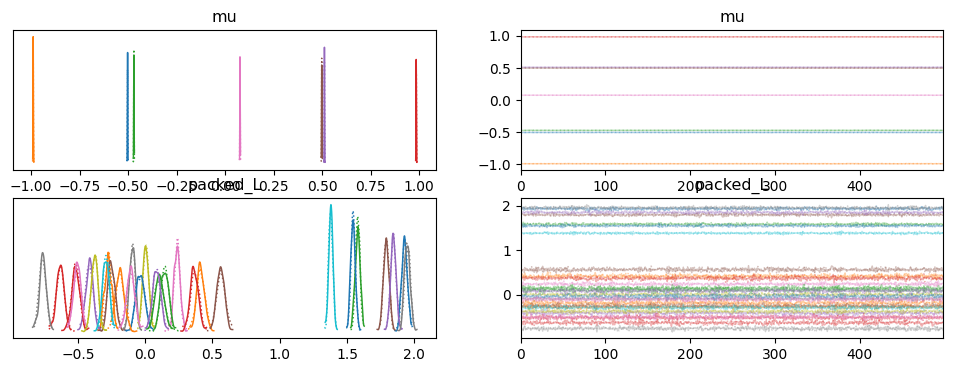

In [14]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/1s5ac/STA365_HW/main/apple_quality.csv'
data = pd.read_csv(url)

# Assuming that all columns except 'A_id' are features for the multivariate normal distribution
data = data.drop('A_id', axis=1)  # Drop the 'A_id' column as it's just an identifier

# Assuming the first column is 'Quality' and it's a categorical variable, not part of the multivariate normal features
data = data.drop('Quality', axis=1)

# X will contain the features, and n and p will be updated based on the dataset
X = data.values
n, p = X.shape  # n is number of observations, p is number of predictors

with pm.Model() as MNV_LKJ:
    # Define the Cholesky factor of the covariance matrix
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.Exponential.dist(1.0, shape=p), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)

    # Define the prior for the mean vector
    # Assuming a weakly informative prior for mu, centered at the mean of the features with a small variance
    mu = pm.MvNormal('mu', mu=np.mean(X, axis=0), cov=np.eye(p)*1e-6, shape=p)

    # The observed data likelihood, parameterized using the Cholesky factor directly
    y_obs = pm.MvNormal('y_obs', mu=mu, chol=L, observed=X)

# Sampling from the model
with MNV_LKJ:
    trace = pm.sample(500, return_inferencedata=True)

# You may want to use ArviZ to diagnose the sampling process and visualize the results
az.plot_trace(trace)
